### Import  bibliotek


In [22]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


### Wczytanie i przygotowanie danych

In [8]:
# wyświetlenie listy kodów z pobranymi opiniami
print(*[filename.removesuffix(".json") for filename in os.listdir("./opinions")], sep="\n")

10869054
148578611
84514582


In [55]:
# wczytanie danych z pliku .json do obiektu przypominającego tabelę
product_id = input("Podaj kod produktu: ")
reviews = pd.read_json(f"./opinions/{product_id}.json").set_index("review_id")
reviews

,author,recomendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
13551598,b...a,Polecam,4/5,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
18299406,U...o,Polecam,"4,5/5",Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
15226709,k...l,Polecam,4/5,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
14283834,Użytkownik Ceneo,Polecam,4/5,"Bardzo wydajna i oszczędna drukarka. Solidna, ...","[jakość wydruków, jakość wydruku]","[głośność pracy, szybkość wydruku]",1,1,2021-04-14 00:32:31,2021-03-23 08:31:21
13654028,p...m,Nie polecam,1/5,"Drukarka jak na tą cenę jest bardzo słaba, Cza...",[],"[głośność pracy, jakość wydruków, jakość wydru...",6,1,2020-12-26 21:42:32,2020-11-26 08:21:40
...,...,...,...,...,...,...,...,...,...,...
12145968,Użytkownik Ceneo,Polecam,5/5,Ok,[],[],0,0,2020-04-14 22:59:01,2020-03-24 10:57:16
12046268,Użytkownik Ceneo,Polecam,5/5,ok,[],[],0,0,2020-04-02 12:47:54,2020-03-19 12:44:23
13466015,w...d,Nie polecam,1/5,badziew,[],[],1,0,2020-11-28 17:08:14,2020-10-28 14:03:29


In [56]:
# transformacja danych
reviews.stars = reviews.stars.apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)
reviews.likes = reviews.likes.astype(int)
reviews.dislikes = reviews.dislikes.astype(int)
reviews

,author,recomendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
13551598,b...a,Polecam,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01
18299406,U...o,Polecam,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01
15226709,k...l,Polecam,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33
14283834,Użytkownik Ceneo,Polecam,4.0,"Bardzo wydajna i oszczędna drukarka. Solidna, ...","[jakość wydruków, jakość wydruku]","[głośność pracy, szybkość wydruku]",1,1,2021-04-14 00:32:31,2021-03-23 08:31:21
13654028,p...m,Nie polecam,1.0,"Drukarka jak na tą cenę jest bardzo słaba, Cza...",[],"[głośność pracy, jakość wydruków, jakość wydru...",6,1,2020-12-26 21:42:32,2020-11-26 08:21:40
...,...,...,...,...,...,...,...,...,...,...
12145968,Użytkownik Ceneo,Polecam,5.0,Ok,[],[],0,0,2020-04-14 22:59:01,2020-03-24 10:57:16
12046268,Użytkownik Ceneo,Polecam,5.0,ok,[],[],0,0,2020-04-02 12:47:54,2020-03-19 12:44:23
13466015,w...d,Nie polecam,1.0,badziew,[],[],1,0,2020-11-28 17:08:14,2020-10-28 14:03:29


### Podstawowe statystyki


In [57]:
reviews_count = reviews.shape[0]
pros_count = reviews.pros.astype(bool).sum()
cons_count = reviews.cons.astype(bool).sum()
pros_cons_count = reviews.apply(lambda r: bool(r.pros) and bool(r.cons), axis=1).sum()
average_stars = round(reviews.stars.mean(), 2)
print(f"Liczba opinii o produkcie: {reviews_count}")
print(f"Liczba opinii przy których podana została lista zalet: {pros_count}")
print(f"Liczba opinii przy których została podana lista wad: {cons_count}")
print(f"Liczba opinii przy których została podana lista zalet oraz lista wad: {pros_cons_count}")
print(f"Średnia liczb gwiazdek dla produktu: {average_stars}")

Liczba opinii o produkcie: 72
Liczba opinii przy których podana została lista zalet: 31
Liczba opinii przy których została podana lista wad: 7
Liczba opinii przy których została podana lista zalet oraz lista wad: 5
Średnia liczb gwiazdek dla produktu: 4.5


In [58]:
pros = reviews.pros.explode().value_counts()
pros

pros
jakość wydruków                  28
szybkość wydruku                 27
jakość wydruku                   26
głośność pracy                   23
czyste napełnianie atramentem     9
wydajność                         9
wydajna                           8
niski koszt wydruku               7
tani atrament                     4
drukowanie poprzez e-mail         3
nowoczesność                      3
doskonały design                  2
innowacyjność                     2
podajnik dokumentów               1
zajmuje mało miejsc               1
Name: count, dtype: int64

In [59]:
cons = reviews.cons.explode().value_counts()
cons

cons
głośność pracy      5
szybkość wydruku    3
jakość wydruków     2
jakość wydruku      2
Name: count, dtype: int64

### Wykresy


In [65]:
recommendation = reviews.recomendation.value_counts(dropna=False).reindex(['Nie polecam', 'Polecam', None], fill_value=0)
recommendation

recomendation
Nie polecam     5
Polecam        67
None            0
Name: count, dtype: int64

<Axes: >

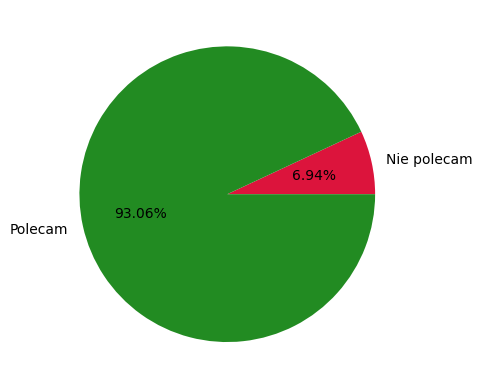

In [66]:
recommendation.plot.pie(
    label = "",
    labels = ['Nie polecam', 'Polecam', 'Nie mam zdania'],
    colors = ['crimson', 'forestgreen', 'khaki'],
    autopct = lambda x: f"{x:1.2f}%" if x>0 else ""
)